# Image preparation

Apziva project #4: "MonReader"<br>
2023 07 27

__Summary:__
* In this notebook, the images are __prepared__ for the __transfer-learning models__ Inception and MobileNet.
* This includes:
    * Turning the images into __squares__, either by squeezing them or by cropping them.
    * __Resizing__ the squares to side lengths 299 and 224.
    * Choosing a __fast anti-aliasing__ method.

## TOC: <a class="anchor" id="TOC"></a>
* [Utilities](#Utilities)
* [General settings](#GeneralSetting)
* [Overview on experiments](#OverviewOnExperiments)
* [Squaring images](#SquaringImages)

## Utilities <a class="anchor" id="Utilities"></a>
[TOC](#TOC)

In [1]:
# own libraries
import Utilities as u
import MachineLearning as ml

# activate changes in libraries
import importlib
importlib.reload(u)
importlib.reload(ml)

# aliases
from Utilities import TypeChecker as t
from Utilities import PrintAlias as p

## General settings <a class="anchor" id="GeneralSetting"></a>
[TOC](#TOC)

In [2]:
# constants

# general
cfltRandomSeed = 42 # any number

# files
cstrDownloadRoot =         "../../OutsideRepository/ImagesRaw/"
cstrImagePreparationRoot = "../../OutsideRepository/ImagesProcessed/"

cdintSquareSides =            {"Inception":299,"MobileNet":224}

clstrTransferLearningModels = ["Inception","MobileNet"]
clstrSquaringStrategies     = ["Squeeze","Crop"]
clstrDownloadDatasets =       ["training","testing"]
clstrDownloadClasses  =       ["flip","notflip"]

clstrMLModels =               ["L2","Random Forest","SVM"]

## Overview on experiments <a class="anchor" id="OverviewOnExperiments"></a>
[TOC](#TOC)

In [3]:
p(f"Overview on experiments".upper())

p(f"- Transfer learning models:")
intCount1 = len(clstrTransferLearningModels)
p(f"  - {intCount1}")
p(f"  - {', '.join(clstrTransferLearningModels)}")

p(f"- Squaring strategies:")
intCount2 = len(clstrSquaringStrategies)
p(f"  - {intCount2}")
p(f"  - {', '.join(clstrSquaringStrategies)}")

p(f"- ML models:")
intCount3 = len(clstrMLModels)
p(f"  - {intCount3}")
p(f"  - {', '.join(clstrMLModels)}")

p(f"- Experiments:")
p(f"  - {intCount1} x {intCount2} x {intCount3}  = {intCount1*intCount2*intCount3}")

p(f"- Estimating data volumn:")
intImages = 2989
fltSizeKB = 56 # after resizing to 299 x 299
intAdjustmentVersions = intCount1*intCount2
p(f"  - Transfer learning x squaring stategies: {intCount1} x {intCount2} = {intAdjustmentVersions} versions")
fltVolumnKB =intImages * fltSizeKB * intAdjustmentVersions
fltVolumnMB = round(fltVolumnKB / 1024)
p(f"  - Volumn:")
p(f"    - {intImages} images x {fltSizeKB} KB x {intAdjustmentVersions} versions ")
p(f"    - {fltVolumnKB} KB")
p(f"    - {fltVolumnMB} MB")

OVERVIEW ON EXPERIMENTS
- Transfer learning models:
  - 2
  - Inception, MobileNet
- Squaring strategies:
  - 2
  - Squeeze, Crop
- ML models:
  - 3
  - L2, Random Forest, SVM
- Experiments:
  - 2 x 2 x 3  = 12
- Estimating data volumn:
  - Transfer learning x squaring stategies: 2 x 2 = 4 versions
  - Volumn:
    - 2989 images x 56 KB x 4 versions 
    - 669536 KB
    - 654 MB


__Comments:__
* 654 MB is __too big__ to be included in the repository (GitHub upload problematic).
* Therefore, the adjusted 12'000 images will be __stored outside the repository__.
* File structure:
    * __OutsideRepository__
        * ImagesRaw
        * __ImagesProcessed__
            * __Inception__
                * __Squeeze__
                    * training
                        * flip
                        * notflip
                    * testing<br>...
                * __Crop__<br>...  
            * __MobileNet__<br>...  
    * Repository<br>...    

## Squaring images <a class="anchor" id="SquaringImages"></a>
[TOC](#TOC)

In [4]:
def CreateFolderStructureForImagesProcessed():
    '''
    Creates a 4-level folder structure for processed images:
    - Transfer learning model
    - squaring strategy
    - dataset
    - target class
    
    When       Who What
    2023 07 27 dh  Created
    '''   
    
    # init
    os.makedirs(cstrImagePreparationRoot)
    
    # create folders in all 4 levels
    for strTransferLearningModel in clstrTransferLearningModels:
        strTFLPath = f"{cstrImagePreparationRoot}/{strTransferLearningModel}"
        os.makedirs(strTFLPath)
        for strSquaringStrategy in clstrSquaringStrategies:
            strSquaringPath = f"{strTFLPath}/{strSquaringStrategy}"
            os.makedirs(strSquaringPath)
            for strDownloadDataset in clstrDownloadDatasets:
                strDatasetPath = f"{strSquaringPath}/{strDownloadDataset}"
                os.makedirs(strDatasetPath)
                for strDownloadClass in clstrDownloadClasses:
                    strClassPath = f"{strDatasetPath}/{strDownloadClass}"
                    os.makedirs(strClassPath)
    
    # finalize
    p("Folder structure created successfully.")  
    p()

In [5]:
from PIL import Image
def ResizeToSquare(strImageInputPath, strImageOutputPath, intSquareSide):
    '''
    Resizes an image to a square of a given size.
    The aspect ratio is NOT preserved.
    
    When       Who What
    2023 07 27 dh  Created
    '''  
    pilImageOriginal = Image.open(strImageInputPath)
    pilImageResized = pilImageOriginal.resize((intSquareSide, intSquareSide), Image.ANTIALIAS) # should be changed to Image.NEAREST
    pilImageResized.save(strImageOutputPath)

In [6]:
from PIL import Image
def CropToSquare(strImageInputPath, strImageOutputPath, intSquareSide):
    '''
    Crops an image to a square of a given size by keeping the central part.
    The aspect ratio is preserved.
    When       Who What
    2023 07 27 dh  Created
    '''  
    # open image
    pilImage = Image.open(strImageInputPath)

    # original image size
    intWidth, intHeight = pilImage.size

    # dimensions for cropping and resizing
    intSmallerDimension = min(intWidth, intHeight)
    intLeft = (intWidth - intSmallerDimension) // 2
    intTop = (intHeight - intSmallerDimension) // 2
    intRight = intLeft + intSmallerDimension
    intBottom = intTop + intSmallerDimension

    # crop the image to a square
    pilCroppedImage = pilImage.crop((intLeft, intTop, intRight, intBottom))

    # resize to size required by model
    # - fast: Image.NEAREST
    # - good: Image.ANTIALIAS
    pilResizedImage = pilCroppedImage.resize((intSquareSide, intSquareSide), resample=Image.NEAREST)

    # save
    pilResizedImage.save(strImageOutputPath)

In [7]:
import pandas as pd
from PIL import Image
def ProcessImagesForTransferLearning(intSampledEvery):
    '''
    Processes images for transfer learning models.
    In productive mode, intSampledEvery must be 1.
    
    When       Who What
    2023 07 27 dh  Created
    2023 08 02 dh  Measure computational time
    ''' 
    
    # init
    u.StopWatch()
    intImagesTotal = 0
    intProcessed = 0
    dlfltTimesUsed = {"Inception":{"Squeeze":[],"Crop":[]},
                      "MobileNet":{"Squeeze":[],"Crop":[]}
                     }
    
    # collect examples
    strExampleFile = ""
    lstrExamplePaths = []
    lstrExampleTypes = []
  
    # loop through all combinations
    for strDownloadDataset in clstrDownloadDatasets:
        for strDownloadClass in clstrDownloadClasses:
            strSourceFolder = f"{cstrDownloadRoot}{strDownloadDataset}/{strDownloadClass}"
            for strTransferLearningModel in clstrTransferLearningModels:
                intSquareSide = cdintSquareSides[strTransferLearningModel]
                for strSquaringStrategy in clstrSquaringStrategies:
                    
                    # define target path
                    strTargetFolder = \
                        f"{cstrImagePreparationRoot}{strTransferLearningModel}/{strSquaringStrategy}/{strDownloadDataset}/{strDownloadClass}/"
                    
                    # init folder
                    intImage = 0
                    
                    # loop through images in source folder
                    blnExampleCollected = False
                    for strFilename in os.listdir(strSourceFolder):
                        if strFilename.lower().endswith(".jpg"): # should always be the case
                            if intImage % intSampledEvery == 0:
                                
                                # define source and target
                                strInputFullPath = os.path.join(strSourceFolder, strFilename)
                                strOutputFullPath = os.path.join(strTargetFolder, strFilename)
                                
                                # remember one example file
                                # - filenames can have identicial names in datasets and target classes
                                # - therefore the training/flip condition
                                if strDownloadDataset == "training" and strDownloadClass == "flip":
                                    if strExampleFile == "":
                                        strExampleFile = strFilename
                                        lstrExamplePaths.append(strInputFullPath)
                                        lstrExampleTypes.append("Raw")
                                    if strExampleFile == strFilename:
                                        lstrExamplePaths.append(strOutputFullPath)
                                        lstrExampleTypes.append(f"{strTransferLearningModel} {strSquaringStrategy}")
                                    
                                # adjust image
                                u.StopWatch()
                                if strSquaringStrategy == "Squeeze":
                                    ResizeToSquare(strInputFullPath, strOutputFullPath, intSquareSide)
                                elif strSquaringStrategy == "Crop":
                                    CropToSquare(strInputFullPath, strOutputFullPath, intSquareSide)
                                else:
                                    p(f"Strange squaring strategy '{strSquaringStrategy}' in function ProcessImagesForTransferLearning().")
                                
                                # remember computational time used
                                dlfltTimesUsed[strTransferLearningModel][strSquaringStrategy].append(u.StopWatch("seconds",blnAsFloat=True))
                                
                                # wrap up image
                                intProcessed += 1
                                    
                        # count images processed       
                        intImage += 1
                        intImagesTotal += 1
    
    # feedback
    fltMinutes = u.StopWatch("minutes",blnAsFloat=True)
    p("Image processing".upper())
    p(f"Total number of images:     {intImagesTotal}")
    p(f"Number of images processed: {intProcessed}")
    p(f"Time for this sample:       {round(fltMinutes,1)} minutes")
    p(f"Extrapolated to all images: {round(fltMinutes*intSampledEvery,1)} minutes")
    p()
    
    # statistics
    p("Seconds used for squaring".upper())
    for strTransferLearningModel in clstrTransferLearningModels:
        for strSquaringStrategy in clstrSquaringStrategies:
            p(f"• Type {strTransferLearningModel}-{strSquaringStrategy}")
            lfltTimesUsed = dlfltTimesUsed[strTransferLearningModel][strSquaringStrategy]
            dfrTimesUsed = pd.DataFrame({"Time used":lfltTimesUsed})
            u.DisplayDataFrame(dfrTimesUsed.describe().applymap(lambda x: round(x, 3)).T)
    
    # finalize
    return lstrExamplePaths,lstrExampleTypes

In [8]:
from PIL import Image
import numpy as np

def ShowImageProcessingExample(lstrExamplePaths,lstrExampleTypes):
    '''
    PhotoGallery(aimgPhotos,lstrTitles,intColumns,fltWidth,fltHeight)
    limgPhotos
    '''
    limgPhotos = []
    for intIndex,strExamplePath in enumerate(lstrExamplePaths):
        pilImage = Image.open(strExamplePath)
        imgCurr = np.array(pilImage)
        limgPhotos.append(imgCurr)
        lstrExampleTypes[intIndex] += f"\n{imgCurr.shape[0]} x {imgCurr.shape[1]}"
    
    # output as gallery
    intPhotos = len(lstrExampleTypes)  
    p()
    p("Example of processing".upper())
    p("- Path of original image:",lstrExamplePaths[0])
    u.PhotoGallery(limgPhotos,lstrTitles=lstrExampleTypes,intColumns=intPhotos,fltWidth=15,fltHeight=7)

Folder structure created successfully.

IMAGE PROCESSING
Total number of images:     11956
Number of images processed: 11956
Time for this sample:       0.0 minutes
Extrapolated to all images: 0.0 minutes

SECONDS USED FOR SQUARING
• Type Inception-Squeeze


,count,mean,std,min,25%,50%,75%,max
Time used,2989.0,0.053,0.006,0.047,0.051,0.052,0.053,0.274


• Type Inception-Crop


,count,mean,std,min,25%,50%,75%,max
Time used,2989.0,0.026,0.002,0.021,0.025,0.026,0.027,0.074


• Type MobileNet-Squeeze


,count,mean,std,min,25%,50%,75%,max
Time used,2989.0,0.041,0.003,0.036,0.04,0.04,0.041,0.152


• Type MobileNet-Crop


,count,mean,std,min,25%,50%,75%,max
Time used,2989.0,0.029,0.016,0.021,0.025,0.025,0.027,0.556



EXAMPLE OF PROCESSING
- Path of original image: ../../OutsideRepository/ImagesRaw/training/flip\0001_000000010.jpg


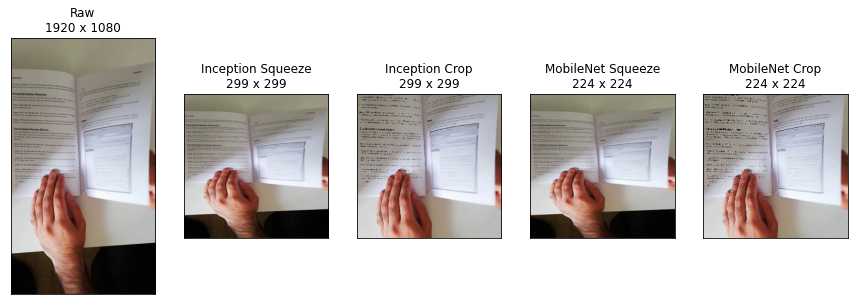

In [10]:
import os
strRootPath = "../../OutsideRepository/ImagesProcessed"

if os.path.exists(cstrImagePreparationRoot):
    strAbsolutePath = os.path.abspath(cstrImagePreparationRoot)
    p("Folder exists".upper())
    p("- The raw images are not converted to transfer learning squares: it has been done before.")
    p("- If the images shall be converted again, the following folder has to be deleted:")
    p(f"     {strAbsolutePath}")
    p("- Converting the images again takes about 20 minutes.")
else:
    CreateFolderStructureForImagesProcessed()
    lstrExamplePaths,lstrExampleTypes = ProcessImagesForTransferLearning(intSampledEvery=1)
    ShowImageProcessingExample(lstrExamplePaths,lstrExampleTypes)

__Observations:__
* There is a combination of __4 image datasets__, for 2 models and for 2 squaring strategies.
* The __computational time__ for squaring and resizing faster for 'MobileNet' and faster for 'Crop'.
    * 'MobileNet-Crop' uses as little as __0.025 ± 0.002 ms__.
* Computational time depends on the interpolation algorithm:
    * __Image.NEAREST__
        * = Nearest-neighbor interpolation
        * is the __fastest resampling method__: it provides a low-quality result with minimal processing time.
    * __Image.ANTIALIAS__:
        * = Image.LANCZOS = Lanczos-windowed sinc interpolation
        * is relatively __slow__, but provides __high-quality__ resizing and is suitable for maintaining image details.    
        * experiments (not documented here) yielded processing times around 40 ms.
    * __Visually__, the two interpolation algorithms yield __similar results__.

__Decision:__
* As time is critical, __NEAREST__ has been chosen for the rest of the project.